## Observations and Insights 

In [1]:
#############################
#                            #
#  Homework 5 - Matplot      #
#  Student - Matheus Gratz   #
#                            #
#############################

# Observations

#### The "doppelganger" (a.k.a the duplicated mouse)
There is a duplicated mouse on the mice list. It is the number ['g989'].
Removing it leaves a clean database with 248 mice.

#### Drugs, drugs, drugs - A true love-and-hate relation
From all drugs, two of them has the most successful results when comparing the size of tumor at the last timepoint.
In this case, Capomulin and Ramicane are the two elected ones. See the boxplot for more insights.

#### The weight vs. Tumor size relation
Rats with higher weight has bigger tumors. There is a 0.95 (or 95%) correlation between weight and tumor size.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


plt.style.use('ggplot') # !!!HEY!!!! I use Dark Theme for Jupyter, so I need to use that.

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
#Print columns to find the common data to join, in this case 'Mouse ID'
print('------------------------------')
print(mouse_metadata.columns)
print(study_results.columns)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(study_results, on='Mouse ID', how='inner')
print('------------------------------')

#Print the dataframe count in order to see if it has any empty/NaN values
print(combined_df.count())
print('------------------------------')

# Display the data table for preview
combined_df

------------------------------
Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')
------------------------------
Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64
------------------------------


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
number_of_mice = len(combined_df.groupby('Mouse ID')['Mouse ID'].nunique())
print('------------------------------')
print(f"There are {number_of_mice} mice registered on this study data")
print('------------------------------')

------------------------------
There are 249 mice registered on this study data
------------------------------


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_duplicated_id = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_id = list(find_duplicated_id .groupby('Mouse ID')['Mouse ID'].nunique().index)
print('------------------------------')
print(f'The duplicated mouse id is {duplicated_id}')
print('------------------------------')

------------------------------
The duplicated mouse id is ['g989']
------------------------------


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df.loc[combined_df['Mouse ID'] != 'g989']
clean_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = len(clean_combined_df.groupby('Mouse ID')['Mouse ID'].nunique())
print('------------------------------')
print(f"There are {number_of_mice_clean} mice registered on this study data")
print('------------------------------')

------------------------------
There are 248 mice registered on this study data
------------------------------


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
count = clean_combined_df.groupby('Drug Regimen')['Mouse ID'].nunique()
mean = clean_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = clean_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#Combine and show the 'whole thing', lol
whole_thing = pd.concat([count, mean, median, variance, stdev, sem], axis=1)
whole_thing.columns = ['# Mice', 'Mean', 'Median', 'Variance', 'StdDev', 'SEM']
whole_thing.reset_index(inplace=True)
whole_thing

,Drug Regimen,# Mice,Mean,Median,Variance,StdDev,SEM
0,Capomulin,25,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,25,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,25,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,25,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,25,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,25,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,24,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,25,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,24,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,25,53.236507,51.818479,48.533355,6.966589,0.516398


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_stats = clean_combined_df.groupby('Drug Regimen').agg(
    Count = ('Mouse ID', 'nunique'),
    Mean = ('Tumor Volume (mm3)', 'mean'),
    Median = ('Tumor Volume (mm3)', 'median'),
    Variance = ('Tumor Volume (mm3)', 'var'),
    StdDev = ('Tumor Volume (mm3)', 'std'),
    SEM = ('Tumor Volume (mm3)', 'sem')
)
summary_stats.reset_index(inplace=True)
summary_stats

,Drug Regimen,Count,Mean,Median,Variance,StdDev,SEM
0,Capomulin,25,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,25,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,25,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,25,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,25,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,25,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,24,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,25,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,24,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,25,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

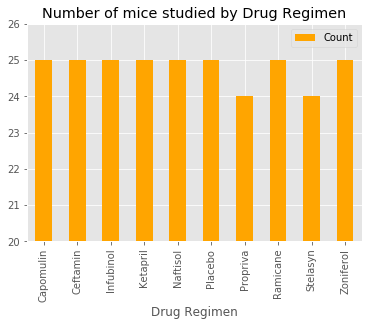

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
summary_stats.plot.bar(x='Drug Regimen', y='Count', ylim=(20,26), title='Number of mice studied by Drug Regimen', color='orange')
plt.show()

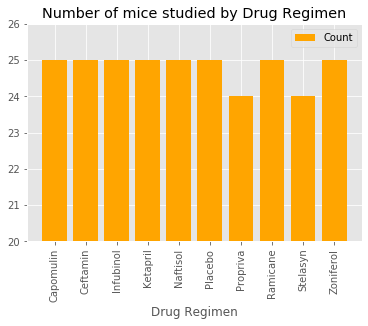

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = summary_stats['Drug Regimen']
count = summary_stats['Count']
plt.bar(x_axis, count, align='center', label='Count', color='orange')
plt.xticks(rotation=90)
plt.ylim(20,26)
plt.legend()
plt.xlabel('Drug Regimen')
plt.title('Number of mice studied by Drug Regimen')
plt.show()

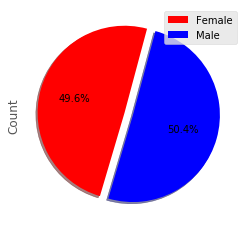

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(clean_combined_df.groupby('Sex')['Mouse ID'].nunique())
gender_df.columns = ['Count']
gender_df.plot.pie(y='Count', autopct='%1.1f%%', explode=[.1,0], colors=['r','b'], startangle=75, legend=True, labels=None, shadow=True)
plt.show()

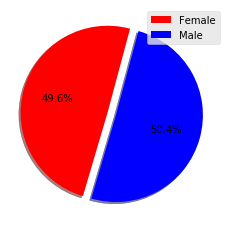

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y_data = gender_df['Count']
plt.pie(y_data, autopct='%1.1f%%', explode=[.1,0], startangle=75, labels=None, shadow=True, colors=['r','b'],)
handles = gender_df.index
plt.legend(handles)
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_combined_df.groupby(['Mouse ID', 'Drug Regimen']).agg(Timepoint = ('Timepoint', 'max'))
last_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_merge_df = last_timepoint_df.merge(clean_combined_df, on=['Mouse ID', 'Drug Regimen', 'Timepoint'], how='inner')
last_timepoint_merge_df  = last_timepoint_merge_df.loc[last_timepoint_merge_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
last_timepoint_merge_df 


,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
3,a275,Ceftamin,45,Female,20,28,62.999356,3
6,a411,Ramicane,45,Male,3,22,38.407618,1
7,a444,Ramicane,45,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,Ceftamin,45,Female,6,27,68.594745,4
239,y793,Capomulin,45,Male,17,17,31.896238,2
240,y865,Ceftamin,45,Male,23,26,64.729837,3
244,z578,Ramicane,45,Male,11,16,30.638696,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
list_treatments = last_timepoint_merge_df['Drug Regimen'].unique()
print('------------------------------')
print('Evaluated Drug Regimens:')
print(list_treatments)
print('------------------------------')


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in list_treatments:
    
    print(f'Treatment: {regimen}')
    temp_df = last_timepoint_merge_df.loc[last_timepoint_merge_df['Drug Regimen'] == regimen]
    quartiles = temp_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of Tumor Volume (mm3), for {regimen} is: {round(lowerq, 3)}")
    print(f"The upper quartile of Tumor Volume (mm3),  for {regimen} is: {round(upperq, 3)}")
    print(f"The interquartile range of Tumor Volume (mm3), for {regimen}  is: {round(iqr, 3)}")
    print(f"The the median of Tumor Volume (mm3), for {regimen} is: {round(quartiles[0.5], 3)} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {round(lower_bound, 3)} mm3 could be outliers.")
    print(f"Values above {round(upper_bound, 3)} mm3 could be outliers.")
    
    lower_out = temp_df['Drug Regimen'][temp_df['Tumor Volume (mm3)'] < lower_bound].count()
    upper_out = temp_df['Drug Regimen'][temp_df['Tumor Volume (mm3)'] > upper_bound].count()
    outliers = lower_out + upper_out
    
    print(f"There are {outliers} posible outliers for {regimen}.")  
    
    print('------------------------------')

------------------------------
Evaluated Drug Regimens:
['Infubinol' 'Ceftamin' 'Ramicane' 'Capomulin']
------------------------------
Treatment: Infubinol
The lower quartile of Tumor Volume (mm3), for Infubinol is: 54.049
The upper quartile of Tumor Volume (mm3),  for Infubinol is: 65.526
The interquartile range of Tumor Volume (mm3), for Infubinol  is: 11.477
The the median of Tumor Volume (mm3), for Infubinol is: 60.165 
Values below 36.833 mm3 could be outliers.
Values above 82.741 mm3 could be outliers.
There are 1 posible outliers for Infubinol.
------------------------------
Treatment: Ceftamin
The lower quartile of Tumor Volume (mm3), for Ceftamin is: 48.722
The upper quartile of Tumor Volume (mm3),  for Ceftamin is: 64.3
The interquartile range of Tumor Volume (mm3), for Ceftamin  is: 15.578
The the median of Tumor Volume (mm3), for Ceftamin is: 59.852 
Values below 25.355 mm3 could be outliers.
Values above 87.666 mm3 could be outliers.
There are 0 posible outliers for Ceftam

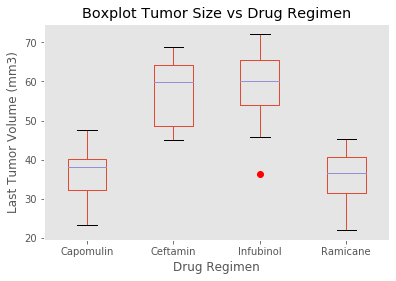

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
last_timepoint_merge_df.boxplot(by='Drug Regimen', column=['Tumor Volume (mm3)'], grid=False, showfliers=True, sym='r')
plt.ylabel('Last Tumor Volume (mm3)')
plt.title('Boxplot Tumor Size vs Drug Regimen')
plt.suptitle(None)
plt.show()

## Line and Scatter Plots

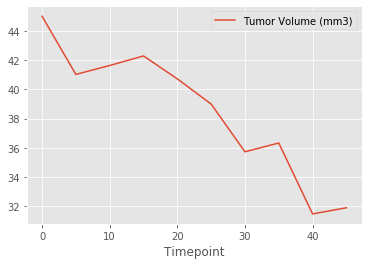

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lineplot_df = clean_combined_df.loc[(clean_combined_df['Mouse ID'] == 'y793') & (clean_combined_df['Drug Regimen'] == 'Capomulin')]
lineplot_df.plot(x='Timepoint',y='Tumor Volume (mm3)')

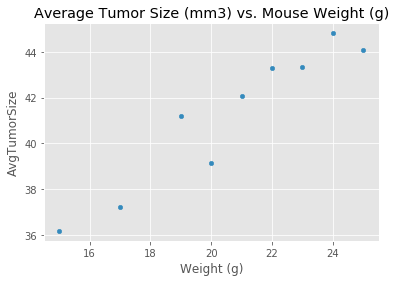

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatterplot_df = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Capomulin']
scatterplot_df = scatterplot_df.groupby('Weight (g)').agg(AvgTumorSize = ('Tumor Volume (mm3)', 'mean')).reset_index()
scatterplot_df.plot(kind='scatter', x='Weight (g)', y='AvgTumorSize', title='Average Tumor Size (mm3) vs. Mouse Weight (g)')                                           


## Correlation and Regression

The correlation between both factors (Weight and Avg. Tumor Volume) is 0.95


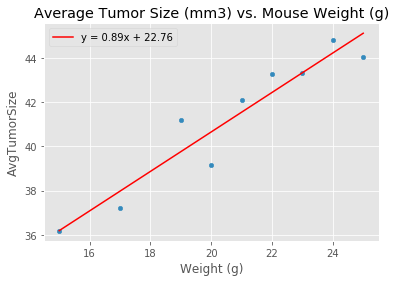

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = scatterplot_df['Weight (g)']
avgtumorvol = scatterplot_df['AvgTumorSize']
correlation = st.pearsonr(weight, avgtumorvol)
print(f"The correlation between both factors (Weight and Avg. Tumor Volume) is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avgtumorvol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
scatterplot_df.plot(kind='scatter', x='Weight (g)', y='AvgTumorSize', title='Average Tumor Size (mm3) vs. Mouse Weight (g)')     
plt.plot(weight,regress_values,"r-", label=line_eq)
plt.legend()
plt.show()

In [21]:
print("""
  _______ _            ______           _ 
 |__   __| |          |  ____|         | |
    | |  | |__   ___  | |__   _ __   __| |
    | |  | '_ \ / _ \ |  __| | '_ \ / _` |
    | |  | | | |  __/ | |____| | | | (_| |
    |_|  |_| |_|\___| |______|_| |_|\__,_|
    """)


  _______ _            ______           _ 
 |__   __| |          |  ____|         | |
    | |  | |__   ___  | |__   _ __   __| |
    | |  | '_ \ / _ \ |  __| | '_ \ / _` |
    | |  | | | |  __/ | |____| | | | (_| |
    |_|  |_| |_|\___| |______|_| |_|\__,_|
    
